![PHENIX](logoPHENIX.png)

## 4) Scientific python: numpy, scipy, pandas and sympy.  

In this part we'll focus on the uses of python as a tool for scientists.

**N.B.** An excellent source for learning more about the capabilities of the jupyter notebook and how it fits in the work-flow of a scientist can be found [here](https://github.com/jrjohansson/scientific-python-lectures).

In [6]:
###### Let's import some useful packages
import numpy as np
########################################################################
# this command allows the user to interact with 
# the plot, e.g. zoom in/out.
%matplotlib notebook
########################################################################
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
########################################################################
# plt.style.use('ggplot') # use ggpolot to render in an r-like manner  #
########################################################################
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('text', usetex=True) 
plt.rcParams['text.latex.unicode'] = True
plt.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
plt.rc('text.latex', preamble=r'\usepackage{cmbright}')

<IPython.core.display.Javascript object>


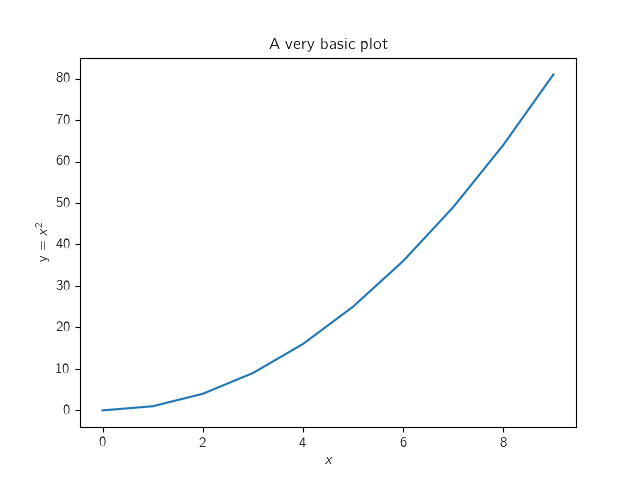

In [7]:
plt.plot(np.arange(10)**2)
plt.ylabel('y = $x^2$')
plt.xlabel('$x$')
plt.title('A very basic plot')
plt.savefig('basic-plot.pdf',format='pdf',dpi=600)

## Extensive constants library
More details found on the scipy [website](https://docs.scipy.org/doc/scipy-0.18.1/reference/constants.html)

In [8]:
# Definition of some constants and conversion factors.
from scipy.constants import codata
e = codata.value('atomic unit of charge')
k = codata.value("Boltzmann constant")
au2angs = codata.value('atomic unit of length')*1e10
const = (e**2)/k
k_B_eV = codata.value('Boltzmann constant in eV/K')